In [1]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Large dataset
import dask.bag as db

In [2]:
review_df = pd.read_json('Musical_Instruments.json.gz', orient='records', lines=True)

In [3]:
review_df = review_df.rename(columns={'overall': 'Rating'})

print ("Total data:", str(review_df.shape))
review_df.head()

Total data: (1512530, 12)


,Rating,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,90,False,"08 9, 2004",AXHY24HWOF184,0470536454,{'Format:': ' Paperback'},Bendy,Crocheting for Dummies by Karen Manthey & Susa...,Terrific Book for Learning the Art of Crochet,1092009600,NaN
1,4,2,True,"04 6, 2017",A29OWR79AM796H,0470536454,{'Format:': ' Hardcover'},Amazon Customer,Very helpful...,Four Stars,1491436800,NaN
2,5,NaN,True,"03 14, 2017",AUPWU27A7X5F6,0470536454,{'Format:': ' Paperback'},Amazon Customer,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO,Five Stars,1489449600,NaN
3,4,NaN,True,"02 14, 2017",A1N69A47D4JO6K,0470536454,{'Format:': ' Paperback'},Christopher Burnett,My girlfriend use quite often,Four Stars,1487030400,NaN
4,5,NaN,True,"01 29, 2017",AHTIQUMVCGBFJ,0470536454,{'Format:': ' Paperback'},Amazon Customer,Arrived as described. Very happy.,Very happy.,1485648000,NaN


In [4]:
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

meta = getDF('meta_Musical_Instruments.json.gz')

In [5]:
meta.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Musical Instruments, Drums & Percussion, Hand...",,[Cricket Rubbing the spine with the wooden sti...,,Wooden Percussion 2 Piece Set of 3 Inch Cricke...,"[B00NP8GYVS, B00NP80XMO, B00NP8M098]",,WADSUWAN SHOP,"[Wood percussion, Owl whistle*, Includes woode...","[>#141,729 in Musical Instruments (See Top 100...",[],Musical Instruments,,"December 2, 2013",,0000989983,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Musical Instruments, Drums & Percussion, Hand...",,[Frog - Rubbing its spine with the wooden stic...,,"Wooden Percussion 3 Piece Set Frog, Cricket an...","[B00NP8GYVS, B00NP80XMO, B01MY48HK5, B00AZZ1AJ...",,WADSUWAN SHOP,"[Wood percussion, Small 3 inches, Creates orig...","[>#1,622 in Musical Instruments (See Top 100 i...",[],Musical Instruments,,"December 2, 2013",$0.91,0000098906,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Musical Instruments, Instrument Accessories, ...",,[Vivaldi's famous set of four violin concertos...,,Hal Leonard Vivaldi Four Seasons for Piano (Or...,[],,Hal Leonard,"[., ., .]","[>#330,653 in Musical Instruments (See Top 100...",[],Musical Instruments,,"May 10, 2011",$62.93,0041291905,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
3,[],,"[The Turn of the Screw (op. 54) vocal score, p...",,The Turn of the Screw (vocal score),"[0486266842, 0793507669, 0393008789, 142341280...",,Boosey &amp; Hawkes,[],"[>#86,354 in Musical Instruments (See Top 100 ...",[],Musical Instruments,,"May 23, 2007",$107.79,0060015500,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,[],,[],,Suite for Organ (including the Trumpet Volunta...,[],,,[],"[>#482,025 in Musical Instruments (See Top 100...",[],Musical Instruments,,"February 8, 2013",,0193757710,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [6]:
product_reviews=pd.merge(review_df,meta,on='asin',how='left')

In [7]:
product_reviews.head()

,Rating,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,5,90,False,"08 9, 2004",AXHY24HWOF184,0470536454,{'Format:': ' Paperback'},Bendy,Crocheting for Dummies by Karen Manthey & Susa...,Terrific Book for Learning the Art of Crochet,...,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"[>#76,268 in Arts, Crafts &amp; Sewing (See To...","[1119287111, 156477998X, 0470045558, 190870724...","Arts, Crafts &amp; Sewing",,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,4,2,True,"04 6, 2017",A29OWR79AM796H,0470536454,{'Format:': ' Hardcover'},Amazon Customer,Very helpful...,Four Stars,...,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"[>#76,268 in Arts, Crafts &amp; Sewing (See To...","[1119287111, 156477998X, 0470045558, 190870724...","Arts, Crafts &amp; Sewing",,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,5,NaN,True,"03 14, 2017",AUPWU27A7X5F6,0470536454,{'Format:': ' Paperback'},Amazon Customer,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO,Five Stars,...,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"[>#76,268 in Arts, Crafts &amp; Sewing (See To...","[1119287111, 156477998X, 0470045558, 190870724...","Arts, Crafts &amp; Sewing",,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
3,4,NaN,True,"02 14, 2017",A1N69A47D4JO6K,0470536454,{'Format:': ' Paperback'},Christopher Burnett,My girlfriend use quite often,Four Stars,...,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"[>#76,268 in Arts, Crafts &amp; Sewing (See To...","[1119287111, 156477998X, 0470045558, 190870724...","Arts, Crafts &amp; Sewing",,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,5,NaN,True,"01 29, 2017",AHTIQUMVCGBFJ,0470536454,{'Format:': ' Paperback'},Amazon Customer,Arrived as described. Very happy.,Very happy.,...,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"[>#76,268 in Arts, Crafts &amp; Sewing (See To...","[1119287111, 156477998X, 0470045558, 190870724...","Arts, Crafts &amp; Sewing",,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [8]:
product_reviews.shape

(1732420, 30)

In [9]:
product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732420 entries, 0 to 1732419
Data columns (total 30 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Rating           int64 
 1   vote             object
 2   verified         bool  
 3   reviewTime       object
 4   reviewerID       object
 5   asin             object
 6   style            object
 7   reviewerName     object
 8   reviewText       object
 9   summary          object
 10  unixReviewTime   int64 
 11  image            object
 12  category         object
 13  tech1            object
 14  description      object
 15  fit              object
 16  title            object
 17  also_buy         object
 18  tech2            object
 19  brand            object
 20  feature          object
 21  rank             object
 22  also_view        object
 23  main_cat         object
 24  similar_item     object
 25  date             object
 26  price            object
 27  imageURL         object
 28  imageURLHigh

In [10]:
product_reviews.isnull().sum()

Rating                   0
vote               1457446
verified                 0
reviewTime               0
reviewerID               0
asin                     0
style               938192
reviewerName           174
reviewText             971
summary                424
unixReviewTime           0
image              1699942
category               717
tech1                  717
description            717
fit                    717
title                  717
also_buy               717
tech2                  717
brand                  717
feature                717
rank                   717
also_view              717
main_cat               717
similar_item           717
date                   717
price                  717
imageURL               717
imageURLHighRes        717
details               3246
dtype: int64

In [11]:
product_reviews2=product_reviews.dropna(subset=['main_cat'])

In [12]:
product_reviews2.shape

(1731703, 30)

In [13]:
product_reviews2.main_cat.unique()


array(['Arts, Crafts &amp; Sewing', 'Musical Instruments',
       'Cell Phones & Accessories', 'Software', 'Toys & Games',
       'Home Audio & Theater', 'All Electronics',
       'Home Audio &amp; Theater', 'Camera & Photo', 'Amazon Home',
       'Video Games', 'Cell Phones &amp; Accessories', 'Computers',
       'Tools &amp; Home Improvement', 'Sports &amp; Outdoors',
       'Car Electronics', 'Industrial & Scientific', 'Pet Supplies',
       'Baby', 'Toys &amp; Games', 'Office Products',
       'Tools & Home Improvement', 'Industrial &amp; Scientific',
       'Sports & Outdoors', 'Camera &amp; Photo', 'Automotive',
       '<img src="https://images-na.ssl-images-amazon.com/images/G/01/nav2/images/gui/amazon-fashion-store-new._CB520838675_.png" class="nav-categ-image" alt="AMAZON FASHION"/>',
       'Health & Personal Care', 'Health &amp; Personal Care',
       '<img src="https://images-na.ssl-images-amazon.com/images/G/01/nav2/images/gui/amazon-fashion-store-new._CB520838675_.png" cl

In [14]:
product_reviews_musical = product_reviews2[product_reviews2["main_cat"].str.contains("Musical Instruments")]

In [15]:
product_reviews_musical.head(10)

,Rating,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
231,5,7,True,"09 14, 2013",AA8PVRAA7NDTL,0615582222,NaN,William Stubblefield,"For the last few years, I have been studying J...",A Unique Perspective on the Creative Process,...,[],"[>#60,754 in Musical Instruments (See Top 100 ...",[],Musical Instruments,,"July 22, 2013",$22.98,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
232,5,5,True,"08 30, 2013",AUG8MS7D0XUL6,0615582222,NaN,Tim ORTLIEB,What an amazing book! I'm so impressed with R...,Required reading for any fan of music or aspir...,...,[],"[>#60,754 in Musical Instruments (See Top 100 ...",[],Musical Instruments,,"July 22, 2013",$22.98,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
233,5,4,True,"08 28, 2013",A2C1GXJXLXX14J,0615582222,NaN,David Hole,"Whether a lover of jazz or not, Radhika Philip...",A wonderful overview of the creative process,...,[],"[>#60,754 in Musical Instruments (See Top 100 ...",[],Musical Instruments,,"July 22, 2013",$22.98,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
234,4,25,False,"12 26, 2011",A14X6A879W6GEA,0739079891,NaN,Shop Around,"I hesitated at first, but nabbed the kit on a ...",Nice Beginner Kit,...,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
235,1,NaN,False,"01 24, 2017",A3PLX7GLR683LV,0739079891,NaN,Brian Michaud,Plain and simple...some of the frets are not p...,Doesn't play in tune - cheaply made,...,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
236,5,NaN,True,"01 10, 2017",A1PSHXL9ZSFD4X,0739079891,NaN,thomas e keller,"she loved it, won't stop playing",Five Stars,...,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
237,5,NaN,True,"12 17, 2016",A253W2LUG7PJWT,0739079891,NaN,Jameson Evans,Thank you,Five Stars,...,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
238,4,NaN,True,"12 17, 2016",A23QUBH9Q4ZY84,0739079891,NaN,Trevor MacDonald,I decided that I wanted to learn to play the u...,Good and cheap for beginners,...,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
239,5,NaN,True,"12 15, 2016",A3KT0WH4XRYHQX,0739079891,NaN,Sylvia,I ordered this ukulele kit for my granddaughte...,She loved it. It is a very nice instrument for...,...,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 

In [16]:
product_reviews_musical.shape

(1644354, 30)

In [17]:
product_reviews_musical.isnull().sum()

Rating                   0
vote               1384601
verified                 0
reviewTime               0
reviewerID               0
asin                     0
style               883441
reviewerName           170
reviewText             931
summary                406
unixReviewTime           0
image              1613227
category                 0
tech1                    0
description              0
fit                      0
title                    0
also_buy                 0
tech2                    0
brand                    0
feature                  0
rank                     0
also_view                0
main_cat                 0
similar_item             0
date                     0
price                    0
imageURL                 0
imageURLHighRes          0
details               2175
dtype: int64

In [18]:
product_reviews_musical1=product_reviews_musical.drop(['image','style','verified', 'vote'],axis=1)


In [19]:
product_reviews_musical1 = product_reviews_musical1.dropna(subset=['reviewerName','reviewText','summary','details'])

In [20]:
product_reviews_musical1.isnull().sum()

Rating             0
reviewTime         0
reviewerID         0
asin               0
reviewerName       0
reviewText         0
summary            0
unixReviewTime     0
category           0
tech1              0
description        0
fit                0
title              0
also_buy           0
tech2              0
brand              0
feature            0
rank               0
also_view          0
main_cat           0
similar_item       0
date               0
price              0
imageURL           0
imageURLHighRes    0
details            0
dtype: int64

In [21]:
product_reviews_musical1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640704 entries, 2089 to 1732419
Data columns (total 26 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Rating           1640704 non-null  int64 
 1   reviewTime       1640704 non-null  object
 2   reviewerID       1640704 non-null  object
 3   asin             1640704 non-null  object
 4   reviewerName     1640704 non-null  object
 5   reviewText       1640704 non-null  object
 6   summary          1640704 non-null  object
 7   unixReviewTime   1640704 non-null  int64 
 8   category         1640704 non-null  object
 9   tech1            1640704 non-null  object
 10  description      1640704 non-null  object
 11  fit              1640704 non-null  object
 12  title            1640704 non-null  object
 13  also_buy         1640704 non-null  object
 14  tech2            1640704 non-null  object
 15  brand            1640704 non-null  object
 16  feature          1640704 non-null

In [22]:
product_reviews_musical1['cat'] = [','.join(map(str, l)) for l in product_reviews_musical1['category']]

In [39]:
product_reviews_musical1['cat'][4295]

'Musical Instruments,Guitars,Classical & Nylon-String Guitars'

In [40]:
product_reviews_musical1['title'].unique()

array(['QSC K10 2-Way Powered Speaker - 1000 Watts, 1x10"',
       'Hohner USA Beginner Harmonica',
       'Sony ECM-MS957 Stereo Microphone with Rotating Mid Capsule', ...,
       'Jackson JS Series Dinky Minion JS1X Electric Guitar Neon Green',
       '2x Deluxe Small 2&quot; Wood Frog Guiro Rasp - Musical Instrument Tone Natural Wood Color World Percussion.',
       'Optical Clear Quartz Crystal Singing Bowl Note G 3rd Octave 7.5&quot;'],
      dtype=object)

In [41]:
product_reviews_guitars = product_reviews_musical1[product_reviews_musical1["title"].str.contains("Guitar|guitar|guitars|Guitars")]

In [92]:
product_reviews_guitars['cat'].unique()

array(['Musical Instruments,Guitars,Classical & Nylon-String Guitars',
       'Musical Instruments,Guitars,Electric Guitars,Solid Body',
       'Musical Instruments,Live Sound &amp; Stage,Stage &amp; Studio Cables,Instrument Cables',
       'Musical Instruments,Guitars,Acoustic Guitars,Beginner Kits',
       'Musical Instruments,Instrument Accessories,Guitar &amp; Bass Accessories,Tuners',
       'Musical Instruments,Guitars,Acoustic Guitars,Steel-string Acoustics',
       'Musical Instruments,Studio Recording Equipment,Computer Recording,Audio Interfaces',
       'Musical Instruments,Guitars,Electric Guitars,Beginner Kits',
       'Musical Instruments,Instrument Accessories,Guitar & Bass Accessories,Stands,Acoustic Guitar Stands',
       'Musical Instruments,Instrument Accessories,Guitar &amp; Bass Accessories',
       'Musical Instruments,Instrument Accessories,Guitar &amp; Bass Accessories,Bags &amp; Cases,Acoustic &amp; Classical Guitar Bags &amp; Cases',
       'Musical Instrument

In [94]:
product_reviews_guitars1 = product_reviews_musical1[product_reviews_musical1["cat"].str.contains('Musical Instruments,Guitars,Classical & Nylon-String Guitars|Musical Instruments,Guitars,Electric Guitars,Solid Body|Musical Instruments,Guitars,Acoustic Guitars,Beginner Kits|Musical Instruments,Guitars,Acoustic Guitars,Steel-string Acoustics|Musical Instruments,Guitars,Electric Guitars,Beginner Kits|Musical Instruments,Bass Guitars,Acoustic & Acoustic-Electric Basses|Musical Instruments,Guitars,Acoustic-Electric Guitars|Musical Instruments,Guitars,Electric Guitars | Musical Instruments,Guitars,Acoustic Guitars')]

In [95]:
product_reviews_guitars1.head()

,Rating,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,tech1,...,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details,cat
4295,3,"01 19, 2005",A2S6XHXPUOUDPV,B00004UE2D,aztec,"I've tried the C40 a number of times, and I've...","Not bad, but not too good either",1106092800,"[Musical Instruments, Guitars, Classical & Nyl...",,...,"[>#13,455 in Musical Instruments (See Top 100 ...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,[],[],{},"Musical Instruments,Guitars,Classical & Nylon-..."
4296,3,"01 19, 2005",A2S6XHXPUOUDPV,B00004UE2D,aztec,"I've tried the C40 a number of times, and I've...","Not bad, but not too good either",1106092800,"[Musical Instruments, Guitars, Classical & Nyl...",,...,"[>#13,455 in Musical Instruments (See Top 100 ...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,[],[],{},"Musical Instruments,Guitars,Classical & Nylon-..."
4297,1,"10 5, 2004",A1E8PWW106DRBE,B00004UE2D,Vasya,It seems to me everyone got exceptional instru...,Everyone seems to get good instrumen I got hor...,1096934400,"[Musical Instruments, Guitars, Classical & Nyl...",,...,"[>#13,455 in Musical Instruments (See Top 100 ...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,[],[],{},"Musical Instruments,Guitars,Classical & Nylon-..."
4298,1,"10 5, 2004",A1E8PWW106DRBE,B00004UE2D,Vasya,It seems to me everyone got exceptional instru...,Everyone seems to get good instrumen I got hor...,1096934400,"[Musical Instruments, Guitars, Classical & Nyl...",,...,"[>#13,455 in Musical Instruments (See Top 100 ...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,[],[],{},"Musical Instruments,Guitars,Classical & Nylon-..."
4299,5,"08 28, 2004",AHY195S8N3XSJ,B00004UE2D,scorpio ari,The C40 is my first guitar and I could not be ...,Happy with my classy Yammy,1093651200,"[Musical Instruments, Guitars, Classical & Nyl...",,...,"[>#13,455 in Musical Instruments (See Top 100 ...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,[],[],{},"Musical Instruments,Guitars,Classical & Nylon-..."


In [97]:
product_reviews_guitars1['review_text'] = product_reviews_guitars1[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
product_reviews_guitars2 = product_reviews_guitars1.drop(['reviewText', 'summary'], axis = 1)
product_reviews_guitars2.head()

,Rating,reviewTime,reviewerID,asin,reviewerName,unixReviewTime,category,tech1,description,fit,...,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details,cat,review_text
4295,3,"01 19, 2005",A2S6XHXPUOUDPV,B00004UE2D,aztec,1106092800,"[Musical Instruments, Guitars, Classical & Nyl...",,"[The Yamaha C40 is an affordable, classical gu...",,...,[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,[],[],{},"Musical Instruments,Guitars,Classical & Nylon-...","Not bad, but not too good either I've tried th..."
4296,3,"01 19, 2005",A2S6XHXPUOUDPV,B00004UE2D,aztec,1106092800,"[Musical Instruments, Guitars, Classical & Nyl...",,"[The Yamaha C40 is an affordable, classical gu...",,...,[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,[],[],{},"Musical Instruments,Guitars,Classical & Nylon-...","Not bad, but not too good either I've tried th..."
4297,1,"10 5, 2004",A1E8PWW106DRBE,B00004UE2D,Vasya,1096934400,"[Musical Instruments, Guitars, Classical & Nyl...",,"[The Yamaha C40 is an affordable, classical gu...",,...,[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,[],[],{},"Musical Instruments,Guitars,Classical & Nylon-...",Everyone seems to get good instrumen I got hor...
4298,1,"10 5, 2004",A1E8PWW106DRBE,B00004UE2D,Vasya,1096934400,"[Musical Instruments, Guitars, Classical & Nyl...",,"[The Yamaha C40 is an affordable, classical gu...",,...,[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,[],[],{},"Musical Instruments,Guitars,Classical & Nylon-...",Everyone seems to get good instrumen I got hor...
4299,5,"08 28, 2004",AHY195S8N3XSJ,B00004UE2D,scorpio ari,1093651200,"[Musical Instruments, Guitars, Classical & Nyl...",,"[The Yamaha C40 is an affordable, classical gu...",,...,[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,[],[],{},"Musical Instruments,Guitars,Classical & Nylon-...",Happy with my classy Yammy The C40 is my first...


In [98]:
product_reviews_guitars2=product_reviews_guitars2.drop(['fit','also_view','also_buy','tech2','tech1','imageURL','imageURLHighRes','details'],axis=1)

In [99]:
good_rate = len(product_reviews_guitars2[product_reviews_guitars2['Rating'] >= 3])
bad_rate = len(product_reviews_guitars2[product_reviews_guitars2['Rating'] < 3])

# Printing rates and their total numbers
print ('{} Good rating reviews'.format(good_rate))
print ('{} Bad rating reviews'.format(bad_rate))

59954 Good rating reviews
9408 Bad rating reviews


In [100]:
product_reviews_guitars2['rating_cat'] = product_reviews_guitars2['Rating'].apply(lambda x: 'bad' if x < 3 else'good')
product_reviews_guitars2.head()

,Rating,reviewTime,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,brand,feature,rank,main_cat,similar_item,date,price,cat,review_text,rating_cat
4295,3,"01 19, 2005",A2S6XHXPUOUDPV,B00004UE2D,aztec,1106092800,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...","Not bad, but not too good either I've tried th...",good
4296,3,"01 19, 2005",A2S6XHXPUOUDPV,B00004UE2D,aztec,1106092800,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...","Not bad, but not too good either I've tried th...",good
4297,1,"10 5, 2004",A1E8PWW106DRBE,B00004UE2D,Vasya,1096934400,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Everyone seems to get good instrumen I got hor...,bad
4298,1,"10 5, 2004",A1E8PWW106DRBE,B00004UE2D,Vasya,1096934400,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Everyone seems to get good instrumen I got hor...,bad
4299,5,"08 28, 2004",AHY195S8N3XSJ,B00004UE2D,scorpio ari,1093651200,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Happy with my classy Yammy The C40 is my first...,good


In [101]:
product_reviews_guitars2[product_reviews_guitars2.duplicated(['reviewerName','unixReviewTime','asin'],keep= False)]

,Rating,reviewTime,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,brand,feature,rank,main_cat,similar_item,date,price,cat,review_text,rating_cat
4295,3,"01 19, 2005",A2S6XHXPUOUDPV,B00004UE2D,aztec,1106092800,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...","Not bad, but not too good either I've tried th...",good
4296,3,"01 19, 2005",A2S6XHXPUOUDPV,B00004UE2D,aztec,1106092800,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...","Not bad, but not too good either I've tried th...",good
4297,1,"10 5, 2004",A1E8PWW106DRBE,B00004UE2D,Vasya,1096934400,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Everyone seems to get good instrumen I got hor...,bad
4298,1,"10 5, 2004",A1E8PWW106DRBE,B00004UE2D,Vasya,1096934400,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Everyone seems to get good instrumen I got hor...,bad
4299,5,"08 28, 2004",AHY195S8N3XSJ,B00004UE2D,scorpio ari,1093651200,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Happy with my classy Yammy The C40 is my first...,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707661,4,"11 16, 2012",A3DLRXIXTU8HVP,B0002F4WLG,Anonymous,1353024000,"[Musical Instruments, Guitars, Electric Guitar...",[Bundled package includes Ibanez GSA60 solid b...,"Ibanez GSA60BKN Electric Guitar, Black Night",Ibanez,[You'll want to play the Ibanez GSA60 Electric...,"[>#386,298 in Musical Instruments (See Top 100...",Musical Instruments,,"July 25, 2009",,"Musical Instruments,Guitars,Electric Guitars,S...",Decent This is a great guitar for Intermediate...,good
1707662,3,"05 6, 2010",AX920TBJU6LEV,B0002F4WLG,Steve T. Ludington,1273104000,"[Musical Instruments, Guitars, Electric Guitar...",[Bundled package includes Ibanez GSA60 solid b...,"Ibanez GSA60BKN Electric Guitar, Black Night",Ibanez,[You'll want to play the Ibanez GSA60 Electric...,"[>#386,298 in Musical Instruments (See Top 100...",Musical Instruments,,"July 25, 2009",,"Musical Instruments,Guitars,Electric Guitars,S...",Good for beginner player. I bought this guitar...,good
1707663,3,"05 6, 2010",AX920TBJU6LEV,B0002F4WLG,Steve T. Ludington,1273104000,"[Musical Instruments, Guitars, Electric Guitar...",[Bundled pa

In [102]:
product_reviews_guitars2.shape

(69362, 19)

In [103]:
product_reviews_guitars2 = product_reviews_guitars2.drop_duplicates(['asin','reviewerName', 'unixReviewTime'], keep = 'first')

In [104]:
product_reviews_guitars2.shape

(59048, 19)

In [105]:
product_reviews_guitars2['time'] = product_reviews_guitars2.reviewTime.str.replace(',', "")
product_reviews_guitars2['time'] = pd.to_datetime(product_reviews_guitars2['time'], format = '%m %d %Y')

# Drop redundant 'reviewTime' column
product_reviews_guitars2 = product_reviews_guitars2.drop('reviewTime', axis = 1)
product_reviews_guitars2.head()

,Rating,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,brand,feature,rank,main_cat,similar_item,date,price,cat,review_text,rating_cat,time
4295,3,A2S6XHXPUOUDPV,B00004UE2D,aztec,1106092800,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...","Not bad, but not too good either I've tried th...",good,2005-01-19
4297,1,A1E8PWW106DRBE,B00004UE2D,Vasya,1096934400,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Everyone seems to get good instrumen I got hor...,bad,2004-10-05
4299,5,AHY195S8N3XSJ,B00004UE2D,scorpio ari,1093651200,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Happy with my classy Yammy The C40 is my first...,good,2004-08-28
4301,4,A29CUCGRX04TS8,B00004UE2D,Sailoil,1092614400,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",What do you want in a Guitar? When you approac...,good,2004-08-16
4303,5,A121WJCKYJ4T03,B00004UE2D,taka(Japanese,1080086400,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",The cost performance of Yamaha is great. Ymaha...,good,2004-03-24


In [106]:
total = len(product_reviews_guitars2)
print ("Number of reviews: ",total)
print ()
 
print ("Number of unique reviewers: ",len(product_reviews_guitars2.reviewerID.unique()))
reviewer_prop = float(len(product_reviews_guitars2.reviewerID.unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()

print ("Number of unique products: ", len(product_reviews_guitars2.asin.unique()))
product_prop = float(len(product_reviews_guitars2.asin.unique())/total)
print ("Prop of unique products: ",round(product_prop,3))
print ()

print ("Average rating score: ",round(product_reviews_guitars2.Rating.mean(),3))


Number of reviews:  59048

Number of unique reviewers:  53467
Prop of unique reviewers:  0.905

Number of unique products:  7570
Prop of unique products:  0.128

Average rating score:  4.18


In [108]:
product_reviews_guitars2[['Rating']].describe()

,Rating
count,59048.000000
mean,4.180243
std,1.274790
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Text(0, 0.5, 'Number of Reviews')

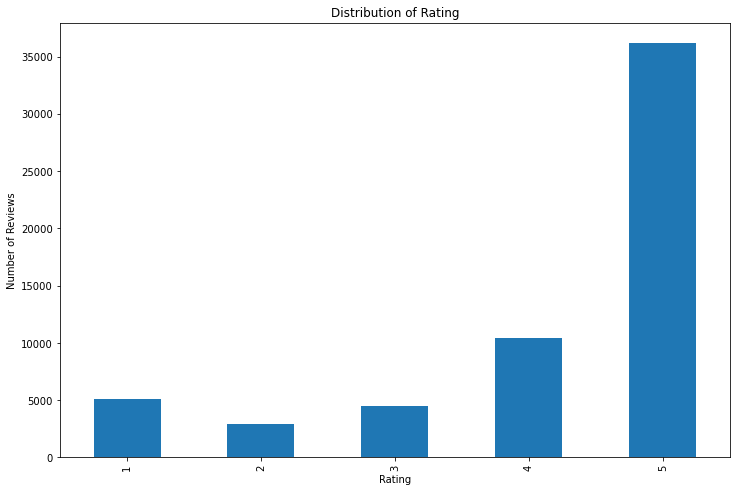

In [109]:
plt.figure(figsize=(12,8))
product_reviews_guitars2['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

In [111]:
class_counts = product_reviews_guitars2.groupby('Rating').size()
class_counts

Rating
1     5068
2     2892
3     4532
4    10393
5    36163
dtype: int64

In [113]:
print('\nNumber of unique customers : {}'.format(len(product_reviews_guitars2['reviewerID'].unique())))
      
print('\nNumber of unique products : {}'.format(len(product_reviews_guitars2['asin'].unique())))

print('\nReview per customer: {}'.format((len(product_reviews_guitars2)/len(product_reviews_guitars2['reviewerID'].unique()))))      

print('\nReview per product: {}'.format((len(product_reviews_guitars2)/len(product_reviews_guitars2['asin'].unique()))))


Number of unique customers : 53467

Number of unique products : 7570

Review per customer: 1.104382142255971

Review per product: 7.800264200792602


In [119]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import unicodedata
import contractions
from contractions import contractions_dict
from nltk.stem import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [120]:
from nltk.tokenize import word_tokenize
raw_tokens=len([w for t in (product_reviews_guitars2["review_text"].apply(word_tokenize)) for w in t])
print('Number of raw tokens: {}'.format(raw_tokens))

Number of raw tokens: 5912853


In [130]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text




def expand_contractions(text, contraction_mapping=contractions_dict):
  contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                    flags=re.IGNORECASE | re.DOTALL)

  def expand_match(contraction):
      match = contraction.group(0)
      first_char = match[0]
      expanded_contraction = contraction_mapping.get(match) \
          if contraction_mapping.get(match) \
          else contraction_mapping.get(match.lower())
      expanded_contraction = first_char + expanded_contraction[1:]
      return expanded_contraction


  try:
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
  except:
    return text
  return expanded_text


# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
#stopword_list.remove('headphone')
#stopword_list.remove('headphones')
#stopword_list.remove('earbuds')
#stopword_list.remove('bud')
#stopword_list.remove('ear')
#stopword_list.remove('sony')
#stopword_list.remove('product')


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

In [131]:
def normalize_and_lemmaize(input):
    sample = denoise_text(input)
    sample = expand_contractions(sample)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [132]:
product_reviews_guitars2['clean_text'] = product_reviews_guitars2['review_text'].map(lambda text: normalize_and_lemmaize(text))

In [133]:
product_reviews_guitars2.head()

,Rating,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,brand,feature,rank,main_cat,similar_item,date,price,cat,review_text,rating_cat,time,clean_text
4295,3,A2S6XHXPUOUDPV,B00004UE2D,aztec,1106092800,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...","Not bad, but not too good either I've tried th...",good,2005-01-19,not bad not good either try c number time alwa...
4297,1,A1E8PWW106DRBE,B00004UE2D,Vasya,1096934400,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Everyone seems to get good instrumen I got hor...,bad,2004-10-05,everyone seehems get good instrumen get horrib...
4299,5,AHY195S8N3XSJ,B00004UE2D,scorpio ari,1093651200,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Happy with my classy Yammy The C40 is my first...,good,2004-08-28,happy classy yammy c first guitar could not ha...
4301,4,A29CUCGRX04TS8,B00004UE2D,Sailoil,1092614400,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",What do you want in a Guitar? When you approac...,good,2004-08-16,want guitar approach purchase musical instrume...
4303,5,A121WJCKYJ4T03,B00004UE2D,taka(Japanese,1080086400,"[Musical Instruments, Guitars, Classical & Nyl...","[The Yamaha C40 is an affordable, classical gu...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"[Designed for Beginners, with an Eye and Ear T...","[>#13,455 in Musical Instruments (See Top 100 ...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",The cost performance of Yamaha is great. Ymaha...,good,2004-03-24,cost performance yamaha great ymaha instrument...


In [136]:
product_reviews_guitars2.to_csv('reviews_guitars.csv', sep=',', encoding='utf-8', index = False)